In [1]:
businesses_df

NameError: name 'businesses_df' is not defined

In [2]:
pwd

'/home/jovyan/work/DSI/yelp/Yelp-Reviews/notebooks'

In [3]:
cd ..

/home/jovyan/work/DSI/yelp/Yelp-Reviews


In [4]:
cd src/

/home/jovyan/work/DSI/yelp/Yelp-Reviews/src


In [5]:
run clean_data.py

In [6]:
businesses_df

,address,AcceptsInsurance,AgesAllowed,Alcohol,Ambience,BYOB,BYOBCorkage,BestNights,BikeParking,BusinessAcceptsBitcoin,...,Tuesday,Wednesday,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,30 Eglinton Avenue W,None,None,u'full_bar',"{'romantic': False, 'intimate': False, 'classy...",None,None,None,False,None,...,9:0-0:0,9:0-0:0,1,43.605499,-79.652289,Emerald Chinese Restaurant,L5R 3E7,128,2.5,ON
1,"10110 Johnston Rd, Ste 15",None,None,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'touris...",None,None,None,True,None,...,None,17:30-21:30,1,35.092564,-80.859132,Musashi Japanese Restaurant,28210,170,4.0,NC
2,6007 Dean Martin Dr,None,None,u'full_bar',"{'romantic': False, 'intimate': True, 'classy'...",None,None,None,False,None,...,None,None,1,36.080168,-115.182756,Hunk Mansion,89118,107,4.0,NV
3,6055 E Lake Mead Blvd,None,None,u'beer_and_wine',"{'romantic': False, 'intimate': False, 'classy...",None,None,None,True,None,...,10:0-21:0,10:0-21:0,1,36.195615,-115.040529,Maria's Mexican Restaurant & Bakery,89156,184,4.5,NV
4,"17025 N Scottsdale Rd, Ste 110",None,None,None,None,None,None,None,True,None,...,9:0-18:0,9:0-18:0,1,33.640308,-111.924528,Nothing Bundt Cakes,85255,174,4.0,AZ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13119,5611 S Valley View Blvd,None,None,u'none',"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,True,False,...,11:30-20:30,11:30-20:30,1,36.087895,-115.190329,Jessie Rae's BBQ,89118,595,4.5,NV
13120,"9719 Sam Furr Rd, Unit C",None,None,u'beer_and_wine',"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,True,None,...,11:0-21:0,11:0-21:0,1,35.443723,-80.864550,Antico Italian Restaurant,28078,142,4.5,NC
13121,578 Yonge Street,None,None,u'beer_and_wine',"{'touristy': False, 'hipster': False, 'romanti...",None,None,None,True,None,...,11:0-23:0,11:0-23:0,1,43.665120,-79.384809,Thai Fantasy,M4Y 1Z3,113,4.0,ON
13122,"8164 S. Las Vegas Blvd., #100",None,None,None,None,None,None,None,True,None,...,0:0-0:0,0:0-0:0,1,36.041407,-115.171698,Starbucks,89123,138,3.0,NV


In [7]:
type(businesses_df)

business_df.BusinessDF

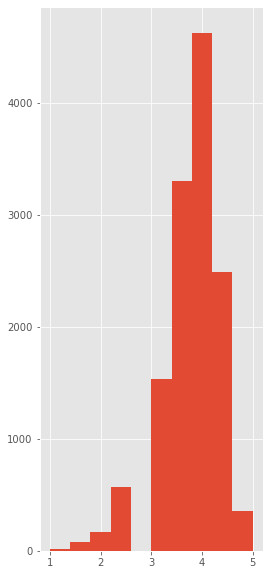

In [16]:
businesses_df.plot_hist('stars')

In [24]:
import business_df as bd

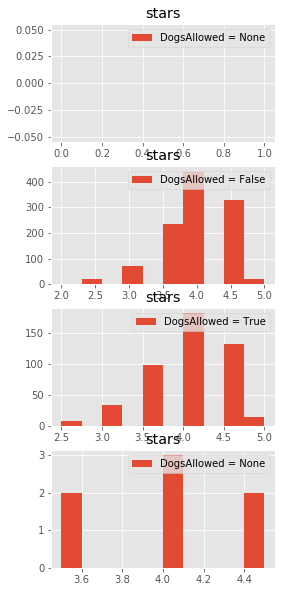

In [37]:
businesses_df.plot_hist('stars', 'DogsAllowed')

In [26]:
type(businesses)

pandas.core.frame.DataFrame

In [38]:
import business_df as bd
businesses_df = bd.BusinessDF(businesses)

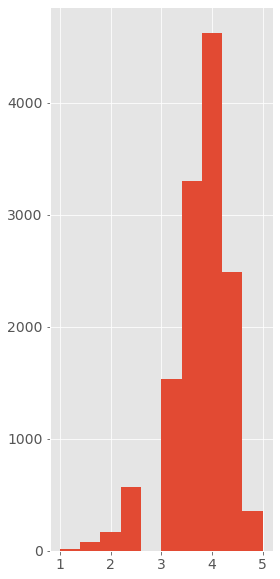

In [83]:
businesses_df.plot_hist('stars')

Text(0, 0.5, 'count of businesses')

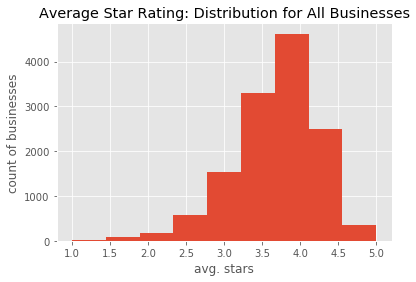

In [46]:
ax = businesses_df['stars'].hist(bins=9)
ax.set_title('Average Star Rating: Distribution for All Businesses')
ax.set_xlabel('avg. stars')
ax.set_ylabel('count of businesses')

In [47]:
plt.rcParams.update({'font.size': 22})

NameError: name 'plt' is not defined

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

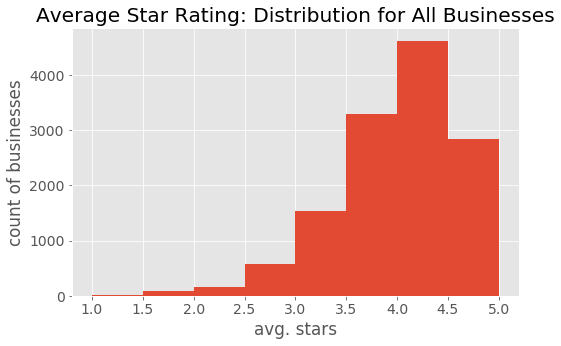

In [59]:
ax = businesses_df['stars'].hist(bins=8)
ax.set_title('Average Star Rating: Distribution for All Businesses')
ax.set_xlabel('avg. stars')
ax.set_ylabel('count of businesses')

fig = ax.figure
fig.set_size_inches(8, 5)
fig.tight_layout(pad=1)
fig.savefig('../images/Overall_stars_hist.png')

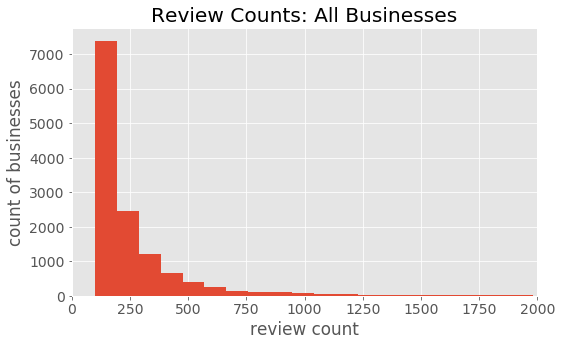

In [69]:
cutoff = 2000
data = businesses_df[businesses_df['review_count'] < cutoff]['review_count']
ax = data.plot.hist(bins=20)
ax.set_title('Review Counts: All Businesses')
ax.set_xlabel('review count')
ax.set_ylabel('count of businesses')
ax.set_xlim(0, cutoff)

fig = ax.figure
fig.set_size_inches(8, 5)
fig.tight_layout(pad=1)
fig.savefig('../images/Overall_reviewCounts_hist.png')

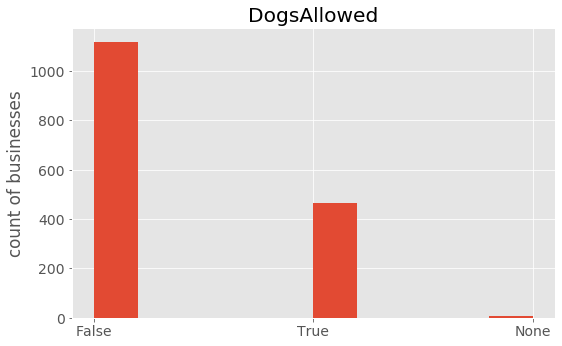

In [70]:
ax = businesses_df['DogsAllowed'].hist()
ax.set_title('DogsAllowed')
ax.set_ylabel('count of businesses')

fig = ax.figure
fig.set_size_inches(8, 5)
fig.tight_layout(pad=1)
# fig.savefig('../images/Overall_stars_hist.png')

In [72]:
businesses_df['Restaurant'] = businesses_df['categories'].str.contains(pat='Restaurant')

In [73]:
businesses_df['Restaurant'].value_counts()

True     9832
False    3292
Name: Restaurant, dtype: int64

In [93]:
import business_df as bd

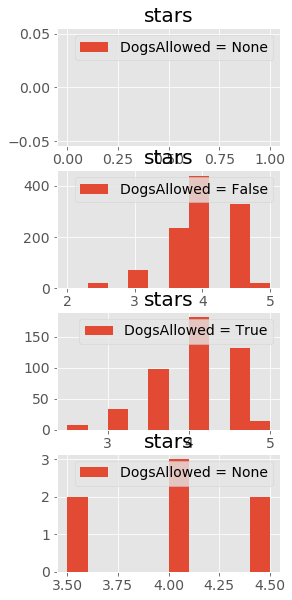

In [97]:
businesses_df.plot_hist('stars', 'DogsAllowed')

In [96]:
businesses_df = bd.BusinessDF(businesses)

In [80]:
pwd

'/home/jovyan/work/DSI/yelp/Yelp-Reviews/src'

In [81]:
run clean_data.py

<Figure size 432x288 with 0 Axes>

In [84]:
type(businesses_df)

business_df.BusinessDF

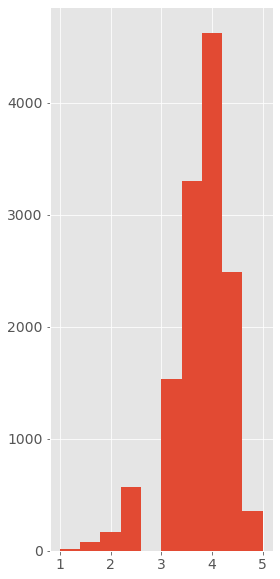

In [85]:
businesses_df.plot_hist('stars')

In [86]:
type(businesses)

pandas.core.frame.DataFrame

In [91]:
new_df = bd.BusinessDF(businesses)

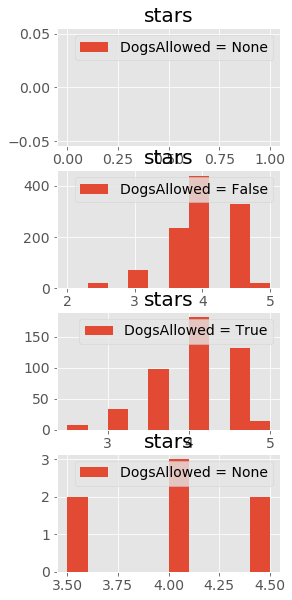

In [92]:
new_df.plot_hist('stars', 'DogsAllowed')

In [99]:
businesses_df['Restaurant']

0         True
1         True
2        False
3         True
4        False
         ...  
13119     True
13120     True
13121     True
13122    False
13123    False
Name: Restaurant, Length: 13124, dtype: bool

In [193]:
from importlib import reload
import business_df as bd
reload(business_df)
from business_df import *

businesses_df = bd.BusinessDF(businesses)
businesses_df['Restaurant'] = businesses_df['categories'].str.contains(pat='Restaurant')

In [136]:
businesses_df['Restaurant'].value_counts()

True     9832
False    3292
Name: Restaurant, dtype: int64

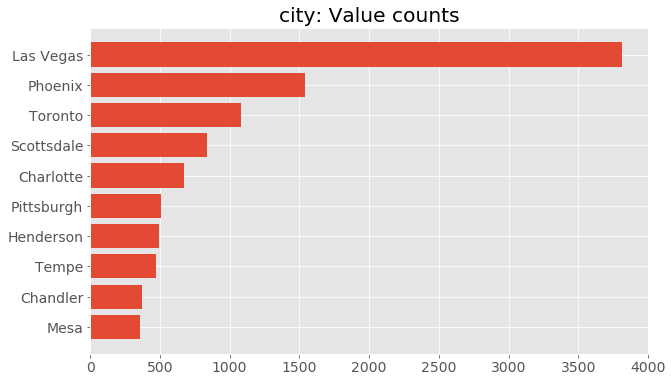

In [172]:
businesses_df.plot_value_counts_bar('city', save=True)

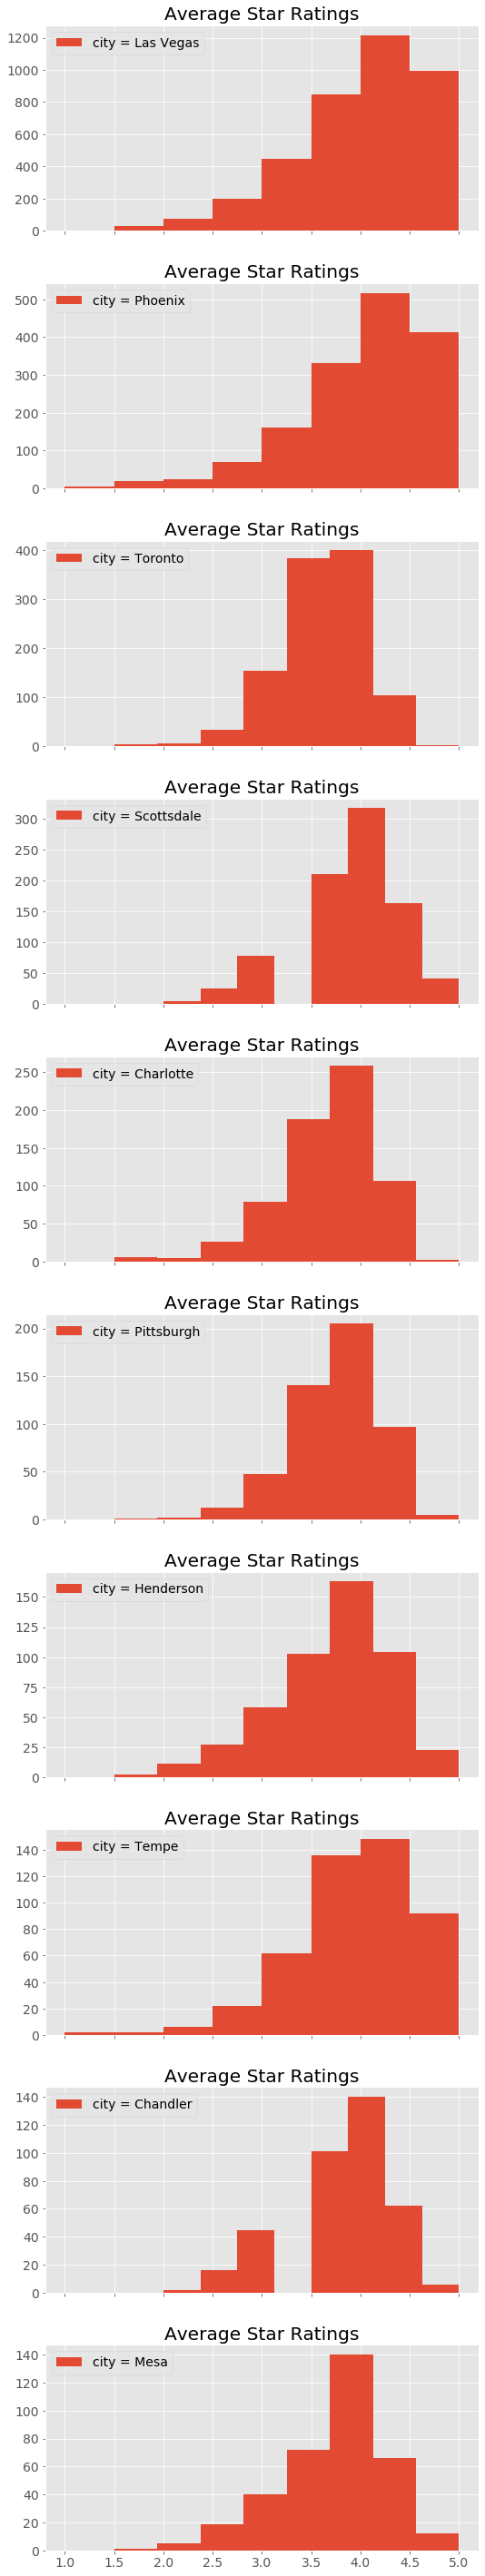

In [195]:
businesses_df.plot_stars_hist('city')